In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf
import keras
from tensorflow.keras import layers

In [24]:
df = pd.read_csv('Sunspots.csv')
df

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7
...,...,...,...
3230,3230,2018-03-31,2.5
3231,3231,2018-04-30,8.9
3232,3232,2018-05-31,13.2
3233,3233,2018-06-30,15.9


In [25]:
df.columns

Index(['Unnamed: 0', 'Date', 'Monthly Mean Total Sunspot Number'], dtype='object')

In [26]:
split_size = 3000
df_train = df[:split_size]
df_test = df[split_size:]

# Preparing the training data

In [27]:
Xtrain = df_train['Monthly Mean Total Sunspot Number'].values
Xtrain.shape

(3000,)

In [28]:
Xtrain.reshape(-1, 1)
Xtrain.shape

(3000,)

In [29]:
time_step = 30
Xtrain_final = []
Ytrain_final = []

for i in range(time_step, len(Xtrain)):
    Xtrain_final.append(Xtrain[i - time_step : i])
    Ytrain_final.append(Xtrain[i])

Xtrain_final = np.array(Xtrain_final)
Ytrain_final = np.array(Ytrain_final)

In [30]:
Xtrain_final = Xtrain_final.reshape(Xtrain_final.shape[0], Xtrain_final.shape[1], 1)
Xtrain_final.shape

(2970, 30, 1)

In [31]:
Ytrain_final.shape

(2970,)

# Model building & prediction for training data

In [32]:
model = keras.Sequential([
    layers.LSTM(units = 100, return_sequences = True, input_shape = (Xtrain_final.shape[1], 1)),
    layers.Dropout(0.2),
    
    layers.LSTM(units = 100, return_sequences = True),
    layers.Dropout(0.2),
    
    layers.LSTM(units = 100, return_sequences = False),
    layers.Dropout(0.2),
    
    layers.Dense(units = 30, activation = 'relu'),
    layers.Dense(units = 1)
    
    
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 30, 100)           40800     
                                                                 
 dropout_3 (Dropout)         (None, 30, 100)           0         
                                                                 
 lstm_4 (LSTM)               (None, 30, 100)           80400     
                                                                 
 dropout_4 (Dropout)         (None, 30, 100)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 30)               

In [35]:
model.compile(loss = 'huber_loss', optimizer = keras.optimizers.Adam(learning_rate = 0.001), metrics = ['mae'])

In [36]:
hist = model.fit(Xtrain_final, Ytrain_final, epochs = 100, batch_size = 32)

Epoch 1/100
93/93 [==============================] - 14s 69ms/step - loss: 61.8645 - mae: 62.3621
Epoch 2/100
93/93 [==============================] - 7s 70ms/step - loss: 44.1663 - mae: 44.6628
Epoch 3/100
93/93 [==============================] - 6s 69ms/step - loss: 24.2810 - mae: 24.7748
Epoch 4/100
93/93 [==============================] - 7s 71ms/step - loss: 20.5126 - mae: 21.0033
Epoch 5/100
93/93 [==============================] - 6s 69ms/step - loss: 19.0024 - mae: 19.4917
Epoch 6/100
93/93 [==============================] - 6s 69ms/step - loss: 18.6609 - mae: 19.1517
Epoch 7/100
93/93 [==============================] - 6s 70ms/step - loss: 18.5101 - mae: 19.0011
Epoch 8/100
93/93 [==============================] - 6s 68ms/step - loss: 18.5405 - mae: 19.0334
Epoch 9/100
93/93 [==============================] - 6s 69ms/step - loss: 18.2130 - mae: 18.7051
Epoch 10/100
93/93 [==============================] - 6s 69ms/step - loss: 18.2297 - mae: 18.7197
Epoch 11/100
93/93 [========

93/93 [==============================] - 6s 69ms/step - loss: 16.0454 - mae: 16.5330
Epoch 85/100
93/93 [==============================] - 6s 68ms/step - loss: 16.5538 - mae: 17.0404
Epoch 86/100
93/93 [==============================] - 6s 67ms/step - loss: 16.3667 - mae: 16.8540
Epoch 87/100
93/93 [==============================] - 6s 70ms/step - loss: 16.1686 - mae: 16.6561
Epoch 88/100
93/93 [==============================] - 6s 69ms/step - loss: 16.0514 - mae: 16.5398
Epoch 89/100
93/93 [==============================] - 6s 69ms/step - loss: 16.0828 - mae: 16.5714
Epoch 90/100
93/93 [==============================] - 6s 69ms/step - loss: 16.2052 - mae: 16.6928
Epoch 91/100
93/93 [==============================] - 6s 69ms/step - loss: 15.9596 - mae: 16.4480
Epoch 92/100
93/93 [==============================] - 6s 69ms/step - loss: 16.2006 - mae: 16.6883
Epoch 93/100
93/93 [==============================] - 6s 69ms/step - loss: 16.0324 - mae: 16.5203
Epoch 94/100
93/93 [=============

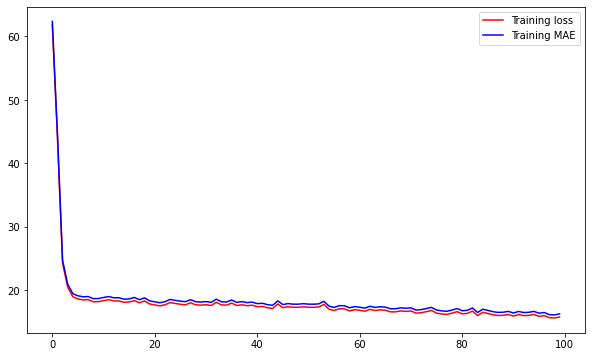

In [41]:
# Set the figure size
plt.figure(figsize=(10, 6))
loss = hist.history['loss']
mae = hist.history['mae']
epochs = range(100)
plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, mae, 'b', label = 'Training MAE')
plt.legend()
plt.show()

In [39]:
Ytrain_pred = model.predict(Xtrain_final)

93/93 [==============================] - 4s 27ms/step


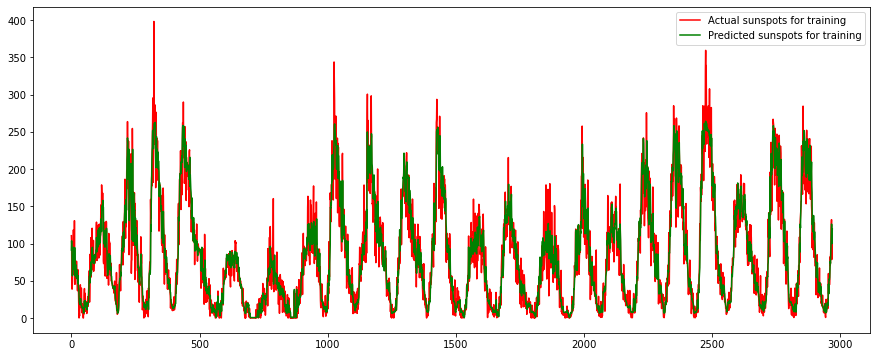

In [44]:
# Set the figure size
plt.figure(figsize=(15, 6))
plt.plot(Ytrain_final, color = 'red', label = 'Actual sunspots for training')
plt.plot(Ytrain_pred, color = 'green', label = 'Predicted sunspots for training')
plt.legend()
plt.show()

# Predicting the testing data

In [45]:
Xtest = df_test['Monthly Mean Total Sunspot Number'].values
Xtest.shape

(235,)

In [46]:
time_step = 30
Xtest_final = []
Ytest_final = []

for i in range(time_step, len(Xtest)):
    Xtest_final.append(Xtest[i - time_step : i])
    Ytest_final.append(Xtest[i])

Xtest_final = np.array(Xtest_final)
Ytest_final = np.array(Ytest_final)

In [47]:
Xtest_final = Xtest_final.reshape(Xtest_final.shape[0], Xtest_final.shape[1], 1)
Xtest_final.shape

(205, 30, 1)

In [48]:
Ytest_final.shape

(205,)

In [49]:
Ytest_pred = model.predict(Xtest_final)

7/7 [==============================] - 0s 27ms/step


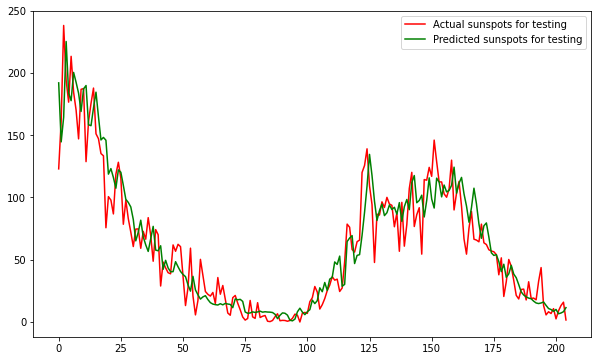

In [50]:
# Set the figure size
plt.figure(figsize=(10, 6))
plt.plot(Ytest_final, color = 'red', label = 'Actual sunspots for testing')
plt.plot(Ytest_pred, color = 'green', label = 'Predicted sunspots for testing')
plt.legend()
plt.show()

In [52]:
r2_score(Ytest_final, Ytest_pred)

0.8549944518222681

We get accuracy of 85.5% for test data